# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from scipy import stats
from IPython.display import display
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

# Importing the dataset

In [2]:
data = pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Understanding the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
data.shape

(50, 5)

In [7]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Checking for missing and duplicate values

In [8]:
data_dup=data.duplicated()
data_dup.sum()

0

In [9]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# EDA

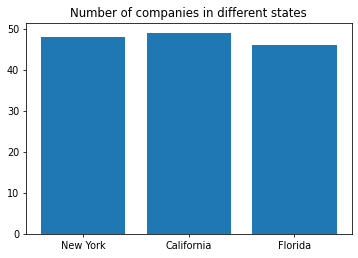

In [10]:
fig, axes = plt.subplots(figsize=(6,4), dpi=70)
plt.bar(data.State, height=data.index)
plt.title('Number of companies in different states');

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

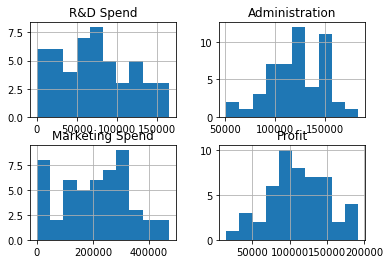

In [11]:
data.hist()

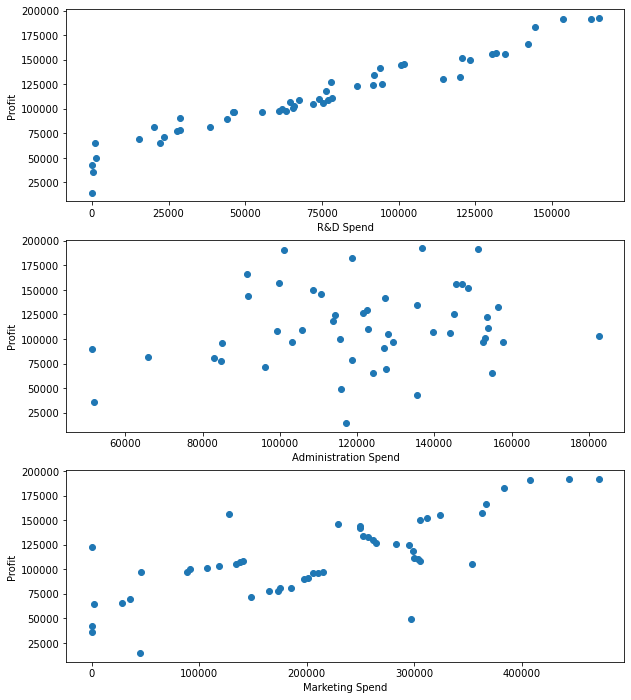

In [12]:
fig, ax = plt.subplots(3, figsize=(10, 12))
ax[0].scatter(x = data['R&D Spend'], y = data['Profit'])
ax[0].set_xlabel("R&D Spend")
ax[0].set_ylabel("Profit")

ax[1].scatter(x = data['Administration'], y = data['Profit'])
ax[1].set_xlabel("Administration Spend")
ax[1].set_ylabel("Profit")

ax[2].scatter(x = data['Marketing Spend'], y = data['Profit'])
ax[2].set_xlabel("Marketing Spend")
ax[2].set_ylabel("Profit")

plt.show()

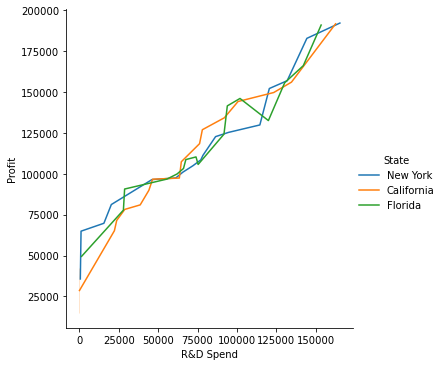

In [13]:
sns.relplot(x="R&D Spend", y="Profit", hue="State",  kind="line", data=data)  

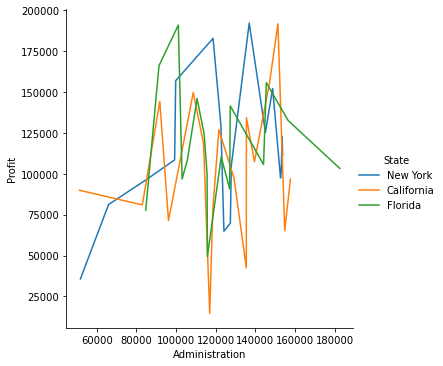

In [14]:
sns.relplot(x="Administration", y="Profit", hue="State",  kind="line", data=data)  

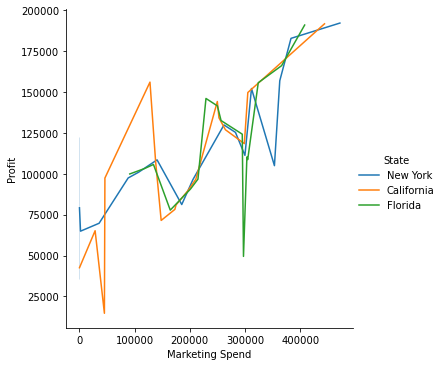

In [15]:
sns.relplot(x="Marketing Spend", y="Profit", hue="State",  kind="line", data=data)  

<AxesSubplot:>

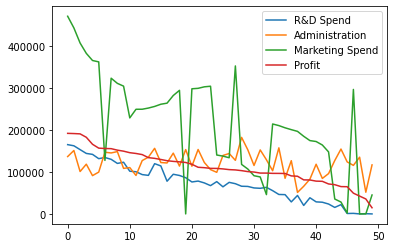

In [16]:
data.plot.line()

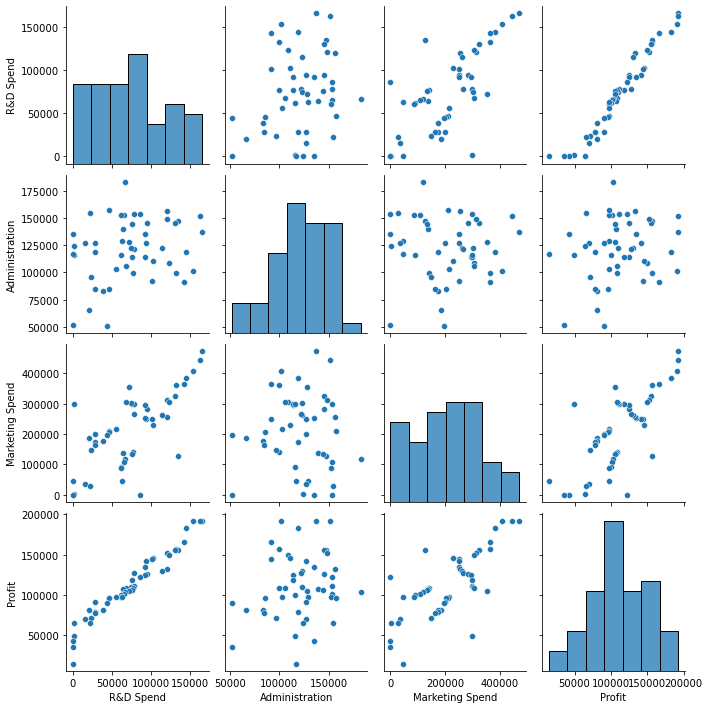

In [17]:
sns.pairplot(data)

# Correlation Matrix

In [18]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


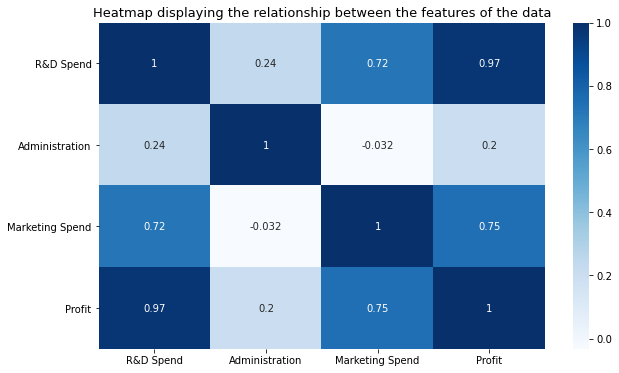

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

# Encode the Categorical data

In [20]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
data.State = lab_enc.fit_transform(data.State)
data.State.unique()
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [21]:
X = data.drop(['Profit'], axis=1)
print(X.head())
print(X.shape)
y = data['Profit']
print(y.head())
print(y.shape)

   R&D Spend  Administration  Marketing Spend  State
0  165349.20       136897.80        471784.10      2
1  162597.70       151377.59        443898.53      0
2  153441.51       101145.55        407934.54      1
3  144372.41       118671.85        383199.62      2
4  142107.34        91391.77        366168.42      1
(50, 4)
0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64
(50,)


# Splitting the dataset into Training and Test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

# Feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting a Multiple Linear Regression Model

In [24]:
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size=0.80, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred =model.predict(X_test)

print("coef:", model.coef_)
print("intercept:", model.intercept_)

coef: [7.77203690e-01 3.02432445e-02 3.49236072e-02 3.15877202e+02]
intercept: 42658.08712324893


In [25]:
print('Train Score: ', model.score(X_train, y_train))
print('Test Score: ', model.score(X_test, y_test))

Train Score:  0.9500009880362248
Test Score:  0.9386861070938133


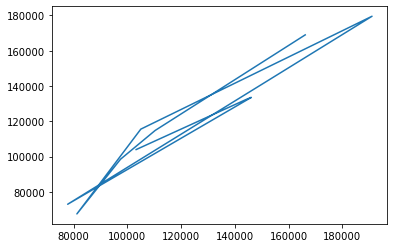

In [26]:
plt.plot(y_test, y_pred)
plt.show()

In [27]:
y_test.shape

(10,)

In [28]:
y_pred.shape

(10,)

In [30]:
import pandas as pd
import numpy as np
y_test = y_test.reshape(10,)
y_pred = y_pred.reshape(10,)

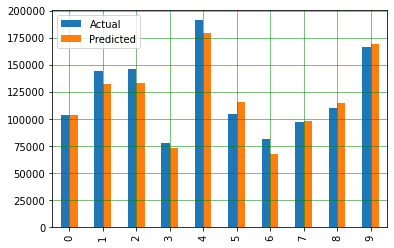

In [32]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Deployment

In [33]:
import pickle 
pickle_out = open("model.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()